# Using Google Trends Data to Analyze Population Movements

In [1]:
%matplotlib notebook
import pandas as pd #pandas 0.25
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

pytrend = TrendReq()

# Define Lookup Parameters
Keywords to look for, Date ranges, geographic areas

In [2]:
# make sure first word is relatively common since it is used to normalize all other searches
keywords = [
    "rent",
    "coronavirus",
    "covid",
    "unemployment",
    "eviction",
    "foreclosure",
    "moving",
    "airbnb",
    "buying house",
    "sick"
]

geographies = [
    'US-TX',
    'US-NY'
]

dates = [
    '2019-10-01 2019-11-01',
    '2019-11-01 2019-12-01',
    '2019-12-01 2020-01-01',
    '2020-01-01 2020-02-01',
    '2020-02-01 2020-03-01',
    '2020-03-01 2020-04-01',
    '2020-04-01 2020-05-01',
    '2020-05-01 2020-06-01',
    '2020-06-01 2020-07-01',
    '2020-07-01 2020-08-01',
    '2020-08-01 2020-09-01',
    '2020-09-01 2020-10-01'
]

### Categories
# Real Estate: 29
# Apartments & Residential Rentals: 378
# Commercial & Investment Real Estate: 1178
# Property Development: 687
# Property Inspections & Appraisals: 463
# Property Management: 425
# Real Estate Agencies: 96
# Real Estate Listings: 1080
# Timeshares & Vacation Properties: 1081

## Get more than 5 search terms
inspiration from: https://medium.com/analytics-vidhya/compare-more-than-5-keywords-in-google-trends-search-using-pytrends-3462d6b5ad62

In [5]:

def get_search_terms(kw_list, date, geo):
    """
    google trends maxes out at 5 search terms; this function splits the data into sets of 5 with a common term
    It then normalizes the data so all terms are on the same scale, then outputs a df
    """

    # group queres into groups of 5 with a common term for normalization
    grouped_queries = []
    i = 0
    j=0
    common_word = kw_list[0]
    for keyword in kw_list:
        if i == 0:
            grouped_queries.append([common_word])

        grouped_queries[j].append(keyword)
        i +=1
        if i > 3:
            i=0
            j+=1

    grouped_queries

    all_terms = pd.DataFrame(data=[])

    for idx, keywords in enumerate(grouped_queries):
        pytrend.build_payload(kw_list=keywords, timeframe=date, geo=geo)
        hist = pytrend.interest_by_region(resolution='DMA', inc_low_vol=True, inc_geo_code=True)

        if idx == 0:
            normal_mean = hist[common_word].mean()

        mean = hist[common_word].mean()
        normalization = normal_mean / mean


        normal_hist = hist[keywords] * normalization
        normal_hist = normal_hist.round(0)
        if idx == 0:
            all_terms = hist
        else:
            all_terms = pd.concat([all_terms, normal_hist], axis=1)
    
    #remove duplicates
    all_terms = all_terms.loc[:,~all_terms.columns.duplicated()]
    return all_terms


In [6]:
# sample function call and output
get_search_terms(keywords, '2020-05-01 2020-06-01', 'US-TX')

,geoCode,rent,coronavirus,covid,unemployment,eviction,foreclosure,moving,airbnb,buying house,sick
geoName,,,,,,,,,,,
Abilene-Sweetwater TX,662,13,31,29,15,0.0,0.0,2.0,2.0,0.0,1.0
Amarillo TX,634,10,33,38,10,0.0,0.0,3.0,2.0,0.0,2.0
Austin TX,635,8,39,36,9,0.0,0.0,3.0,3.0,0.0,1.0
Beaumont-Port Arthur TX,692,10,28,23,29,0.0,0.0,2.0,3.0,0.0,1.0
Corpus Christi TX,600,11,31,25,22,0.0,0.0,2.0,2.0,0.0,1.0
Dallas-Ft. Worth TX,623,10,37,30,13,0.0,0.0,2.0,3.0,0.0,1.0
El Paso TX,765,8,40,31,13,0.0,0.0,2.0,2.0,0.0,1.0
Harlingen-Weslaco-Brownsville-McAllen TX,636,9,36,24,22,0.0,0.0,2.0,3.0,0.0,1.0
Houston TX,618,9,37,28,17,0.0,0.0,2.0,3.0,0.0,1.0


## Get all terms from inputted parameters
this loops over all the paramters you are interested in and builds an overall dataframe

In [7]:
term_history = pd.DataFrame(data=[])

for geography in geographies:
    for date in dates:
        region_history = get_search_terms(keywords, date, geography)
        region_history['Date'] = date.split(" ")[0]
        term_history = term_history.append(region_history)

In [277]:
# write data to csv
term_history.to_csv('search_terms_by_location.csv')
term_history

,geoCode,rent,coronavirus,covid,unemployment,eviction,foreclosure,moving,airbnb,buying house,sick,Date
geoName,,,,,,,,,,,,
Abilene-Sweetwater TX,662,49,0,0,3,0.0,0.0,7.0,10.0,1.0,12.0,2019-10-01
Amarillo TX,634,48,0,0,5,1.0,1.0,8.0,12.0,1.0,8.0,2019-10-01
Austin TX,635,48,0,0,5,0.0,1.0,12.0,16.0,1.0,10.0,2019-10-01
Beaumont-Port Arthur TX,692,47,0,0,7,1.0,1.0,11.0,7.0,1.0,8.0,2019-10-01
Corpus Christi TX,600,46,0,0,8,1.0,1.0,10.0,10.0,1.0,8.0,2019-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...
New York NY,501,13,14,35,25,0.0,0.0,3.0,2.0,0.0,1.0,2020-09-01
Rochester NY,538,10,10,40,30,0.0,0.0,2.0,2.0,0.0,2.0,2020-09-01
Syracuse NY,555,9,12,46,24,0.0,0.0,3.0,2.0,0.0,2.0,2020-09-01


### Add county mapping to the DMA data
this is an optional step if we want the df to have county level data, it just maps the DMA in the trends data to a county. Each DMA can contain many counties so this will create duplicate data

In [152]:
dma_mapping = pd.read_csv('./GoogleTrends_CountyDMA_Mapping.csv');

county_term_data = pd.merge(region_history, dma_mapping, left_on='geoName', right_on='GOOGLE_DMA')

## Plotting with Folium
Optional step, but it allows you to quickly see the data we have loaded from google trends

In [12]:
import folium
from folium.plugins import FastMarkerCluster
import branca
import json


colorscale = branca.colormap.linear.YlOrRd_09.scale(20, 30)

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
county_data = f'{url}/us_county_data.csv'
county_geo = f'{url}/us_counties_20m_topo.json'


# change this function to change plotting data
def style_function(feature):
    trends = term_history.loc[term_history['geoCode'].astype(int) == int(feature['id'])]
    return {
        'fillOpacity': 0.5,
        'weight': 0,
        'fillColor': '#black' if trends.size == 0 else colorscale(trends['rent'].mean())
    }


m = folium.Map(
    location=[48, -102],
    tiles='cartodbpositron',
    zoom_start=3
)

with open('us_dma_poly.json') as json_file:
    poly = json.load(json_file)

folium.TopoJson(
    poly,
    'objects.nielsen_dma',
    style_function=style_function
).add_to(m)


m

# Plotting with matplotlib
pandas has an internal plot method we can utilize to create line charts

<IPython.core.display.Javascript object>


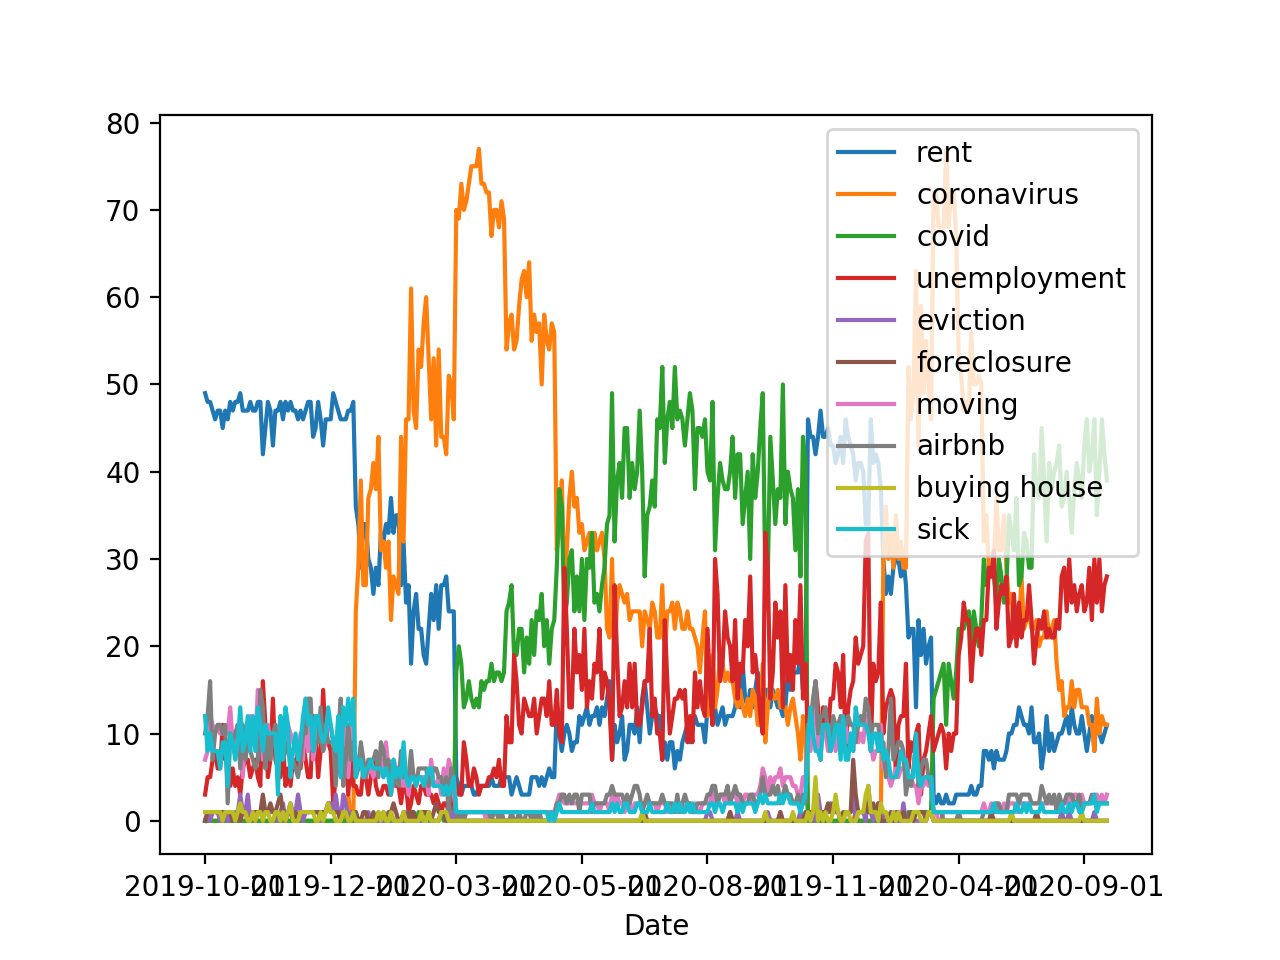

In [280]:
term_history.plot(x='Date')